# 12. Batch Normalization (батч-нормализация) что это такое?

In [2]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

%matplotlib inline

#### Рекомендация

- изначально стоить нейронные сети без batch normalization (или dropout) и если наблюдается медленно обучение или эффект переобучения, то можно попробовать добавить batch normalization или dropout, Но не оба вместе.

#### Реализация batch normalization в Keras

In [3]:
#загрузка обучающей и тестовой выборок

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация входных данных

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [4]:
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit : limit*2]
y_valid = y_train_cat[limit : limit*2]

In [5]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/home/alexandr/anaconda3/envs/tens/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#запуск процесса обучения c BatchNormalization

his = model.fit(x_train_data, y_train_data, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7399 - loss: 0.8128 - val_accuracy: 0.8792 - val_loss: 0.5171
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9501 - loss: 0.1810 - val_accuracy: 0.9132 - val_loss: 0.2975
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.1011 - val_accuracy: 0.9304 - val_loss: 0.2308
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0599 - val_accuracy: 0.9240 - val_loss: 0.2659
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0455 - val_accuracy: 0.9380 - val_loss: 0.2039
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0320 - val_accuracy: 0.9330 - val_loss: 0.2149
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0194 - val_accuracy: 0.9346 - val_loss: 0.2203
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0169 - val_accuracy: 0.

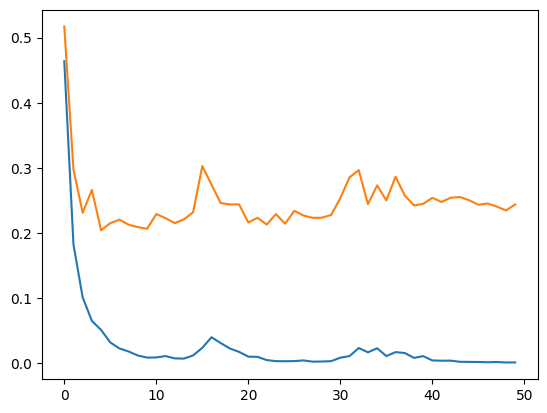

In [7]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [8]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    #BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7306 - loss: 0.9433 - val_accuracy: 0.9054 - val_loss: 0.3350
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.2555 - val_accuracy: 0.9200 - val_loss: 0.2766
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1614 - val_accuracy: 0.9218 - val_loss: 0.2510
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9735 - loss: 0.1122 - val_accuracy: 0.9266 - val_loss: 0.2495
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0826 - val_accuracy: 0.9324 - val_loss: 0.2244
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9873 - loss: 0.0657 - val_accuracy: 0.9328 - val_loss: 0.2168
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0465 - val_accuracy: 0.9330 - val_loss: 0.2265
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0353 - val_accuracy: 0.

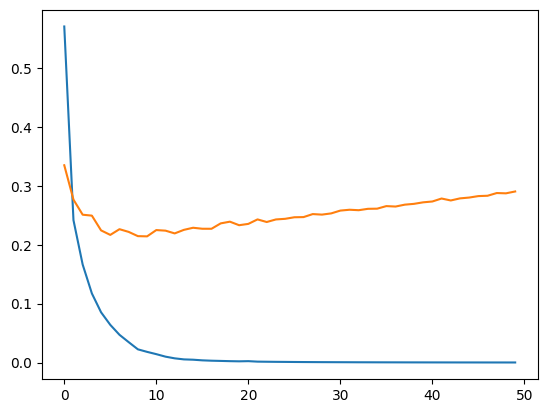

In [9]:
#запуск процесса обучения без BatchNormalization

his = model.fit(x_train_data, y_train_data, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid))

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()